**Install required packages**

In [1]:
!pip install mediapipe opencv-python-headless scikit-learn pandas numpy matplotlib seaborn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style='whitegrid', palette='Set2')
print('All libraries imported successfully')

All libraries imported successfully


**Load Dataset**

In [3]:
Data_Path = "/content/hand_landmarks_data.csv"
df = pd.read_csv(Data_Path , sep ="," , header = 0 ,encoding = "utf-8")
print("Hand Landmarks Dataset Loaded Successfully")

Hand Landmarks Dataset Loaded Successfully


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (25675, 64)


In [5]:
print(f'Columns (first 10): {df.columns.tolist()[:10]} ...')
df.head()

Columns (first 10): ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4'] ...


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
print('\n Dataset Info:')
print(f'  Total samples : {len(df):,}')
print(f'  Total features: {df.shape[1] - 1}')
print(f'  Label column  : {df.columns[-1]}')
print(f'  Classes       : {df[df.columns[-1]].nunique()}')


 Dataset Info:
  Total samples : 25,675
  Total features: 63
  Label column  : label
  Classes       : 18


In [7]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


# **Data Preprocessing**

**Recentering & Normalization**

In [8]:
def normalize_landmarks(df):
    """
    Normalize hand landmarks:
      1. Translate so wrist (landmark 1) is at origin
      2. Scale by middle-finger tip (landmark 13) distance from origin
      z coordinates are kept as-is (already normalized by MediaPipe)
    """
    df_norm = df.copy()
    label_col = df.columns[-1]

    for i in range(1,22):

        df_norm[f'x{i}'] = df[f'x{i}'] - df['x1']
        df_norm[f'y{i}'] = df[f'y{i}'] - df['y1']


    scale = np.sqrt(df_norm['x13']**2 + df_norm['y13']**2)
    scale = scale.replace(0, 1e-6)

    for i in range(1,22):
        df_norm[f'x{i}'] = df_norm[f'x{i}'] / scale
        df_norm[f'y{i}'] = df_norm[f'y{i}'] / scale


    return df_norm

In [9]:
df_norm = normalize_landmarks(df)
print('Normalization complete')
print(f'Sample wrist after normalization :   x1    = {df_norm["x1"].iloc[0]:.4f} ,  y1  = {df_norm["y1"].iloc[0]:.4f}')
print(f'Sample mid-tip after normalization : x13   = {df_norm["x13"].iloc[0]:.4f},  y13 = {df_norm["y13"].iloc[0]:.4f}')

Normalization complete
Sample wrist after normalization :   x1    = 0.0000 ,  y1  = 0.0000
Sample mid-tip after normalization : x13   = -0.9667,  y13 = 0.2558


In [10]:
df_norm.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


**Visualize Hand Landmarks After Normalization**

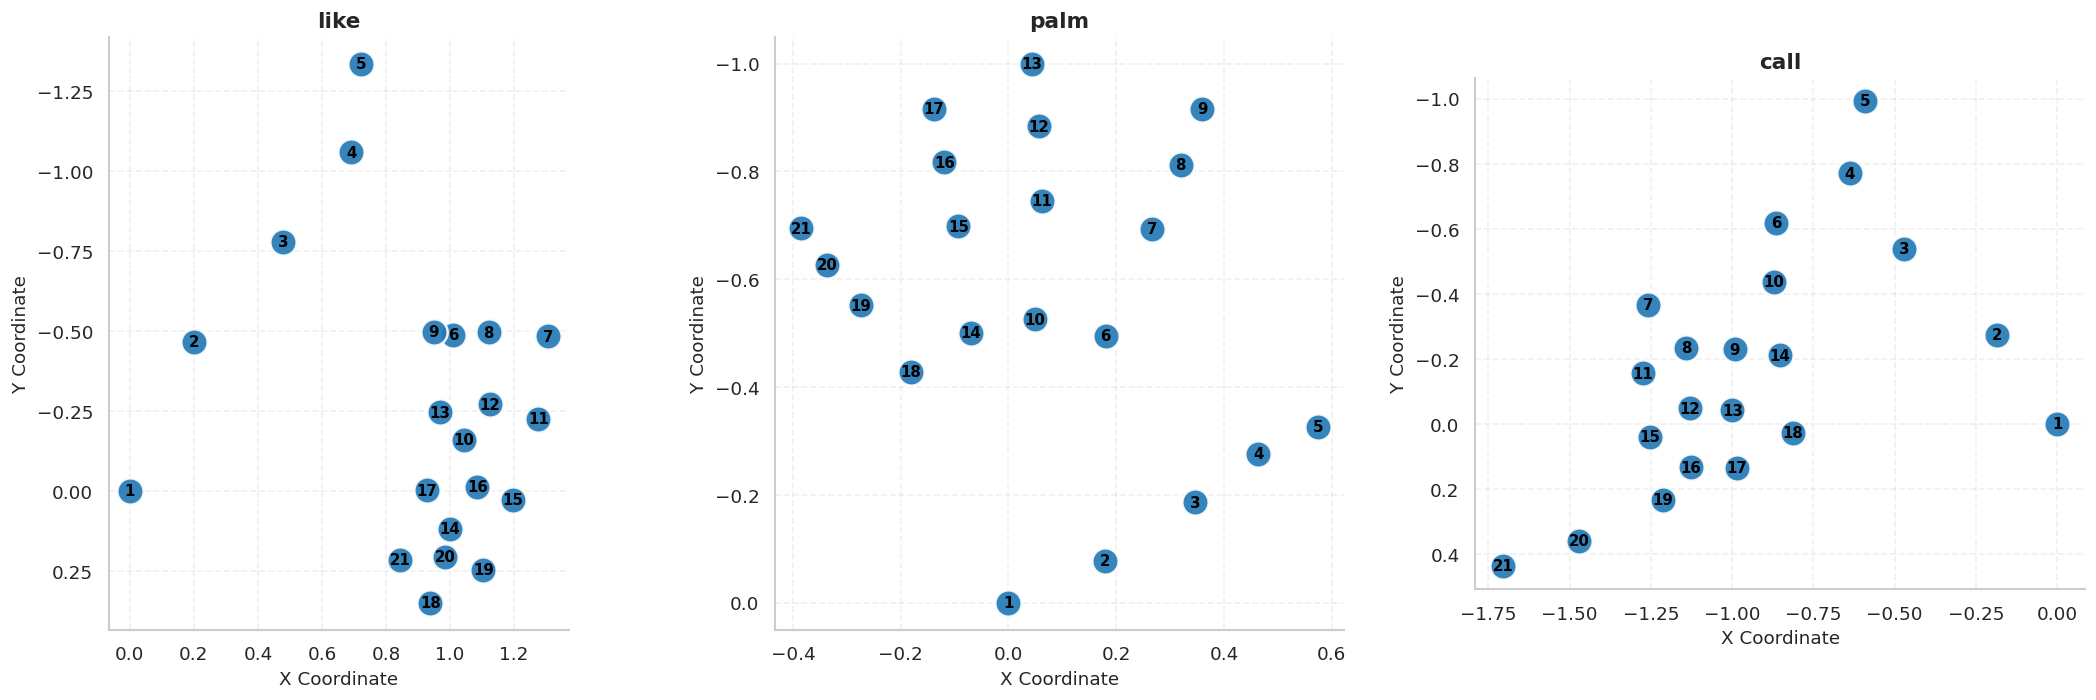

In [11]:
rows = df_norm.iloc[[6100, 12000,1500]]
plt.figure(figsize=(18, 6))

for idx, (_, row_data) in enumerate(rows.iterrows()):

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(1, 3, idx + 1)

    plt.scatter(
        x_values,
        y_values,
        s=250,
        c="#1f77b4",
        edgecolors="white",
        linewidth=1.5,
        alpha=0.9
    )

    for i in range(21):
        plt.text(
            x_values[i],
            y_values[i],
            str(i+1),
            fontsize=9,
            weight='bold',
            ha='center',
            va='center',
            color='black'
        )

    plt.xlabel("X Coordinate", fontsize=11)
    plt.ylabel("Y Coordinate", fontsize=11)
    plt.title(f"{row_data['label']}",fontsize=13, weight='bold')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**Features / Label Split**

In [12]:
label_col = df.columns[-1]
feature_cols = [c for c in df_norm.columns if c != label_col]
X = df_norm[feature_cols].values
y_raw = df_norm[label_col].values

In [13]:
print(f"X Shape: {X.shape}")
print(f"y Shape: {y_raw.shape}")

X Shape: (25675, 63)
y Shape: (25675,)


**Encode labels**

In [14]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)
print("Unique encoded labels:")
print(np.unique(y))

Unique encoded labels:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [15]:
print(f"\nLabel Mapping:\n")
for i, label in enumerate(encoder.classes_):
    print(f"class {label} --> {i}")


Label Mapping:

class call --> 0
class dislike --> 1
class fist --> 2
class four --> 3
class like --> 4
class mute --> 5
class ok --> 6
class one --> 7
class palm --> 8
class peace --> 9
class peace_inverted --> 10
class rock --> 11
class stop --> 12
class stop_inverted --> 13
class three --> 14
class three2 --> 15
class two_up --> 16
class two_up_inverted --> 17


**Save Encoder**

In [16]:
joblib.dump(encoder,"label_encoder.pkl")
print("Label Encoder saved successfully")

Label Encoder saved successfully


**Train / Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8 , test_size = 0.2, random_state = 42, stratify = y)
print(f'Training samples : {X_train.shape[0]:,}')
print(f'Testing  samples : {X_test.shape[0]:,}')

Training samples : 20,540
Testing  samples : 5,135


In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20540, 63)
y_train shape: (20540,)
X_test shape: (5135, 63)
y_test shape: (5135,)


**Save Train & Test Data and Labels**

In [19]:
joblib.dump(
    {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    },
    "dataset_splits.pkl"
)

print("Dataset splits saved successfully")

Dataset splits saved successfully
